In [1]:
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np

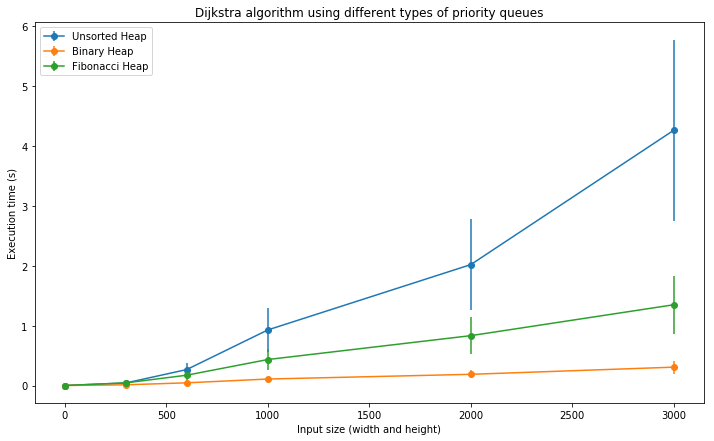

In [3]:
TEST_SIZE = 6
PER_SIZE = 5
INT_MAX = 100;
size = [1, 300, 600, 1000, 2000, 3000]
im = ['u', 'b', 'f']
plt.figure(figsize=(12,7))

for flag in range(3):
    y=np.array([])
    conf_interval=np.array([])
    for cases in range(TEST_SIZE):
        time=np.array([])
        # get time array per size per implementation
        for i in range(PER_SIZE):
            with open('../outputs/' + im[flag] + '{}{}.out'.format(cases, i), 'r') as f:
                data=f.read();
                data = data.split('\n')
                time = np.append(time, float(data[0]))
                
        y = np.append(y, np.mean(time))  # one point on one line
        conf_interval = np.append(conf_interval, np.std(y))
    plt.errorbar(size, y, yerr = conf_interval, fmt = '-o')

plt.legend(['Unsorted Heap', 'Binary Heap', 'Fibonacci Heap'], loc = 'upper left')
plt.xlabel('Input size (width and height)')
plt.ylabel('Execution time (s)')
plt.title('Dijkstra algorithm using different types of priority queues')
plt.savefig('res.png')
plt.show()